# Customer Segmentation Analysis
Done by **Rayen Fares** 

## Introduction

In this notebook, we will be analysing the [Mall customers](https://www.kaggle.com/datasets/shwetabh123/mall-customers) dataset
from Kaggle. This dataset contains information about 200 customers, including their age, gender, annual income, and spending score.
The DataFrame will have the following columns:

* `CustomerID`: A unique identifier for each customer
* `Age`: The customer's age
* `Gender`: The customer's gender
* `AnnualIncome`: The customer's annual income
* `SpendingScore`: The customer's spending score


In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1.Data preprocessing

In [2]:
# Load the dataset
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df = df.drop(['CustomerID'], axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [5]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [16]:
#rename columns
df.rename(columns={'Annual Income (k$)':'AnnualIncome','Genre':'Gender','Spending Score (1-100)':'SpendingScore'},inplace=True)

In [17]:
df.head()

,Gender,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [12]:
df.shape

(200, 4)

### 2.Data Analysis

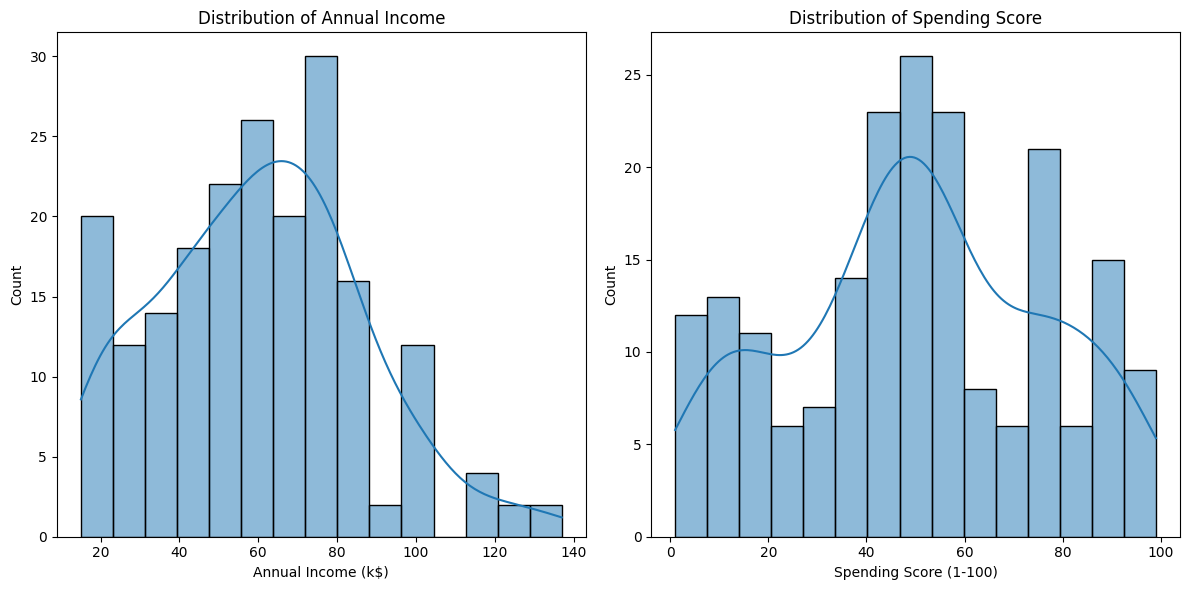

In [18]:
## Distribution of variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['AnnualIncome'], bins=15, kde=True)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.title('Distribution of Annual Income')

plt.subplot(1, 2, 2)
sns.histplot(df['SpendingScore'], bins=15, kde=True)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.title('Distribution of Spending Score')

plt.tight_layout()
plt.show()

In [20]:
#show gender value counts
df.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

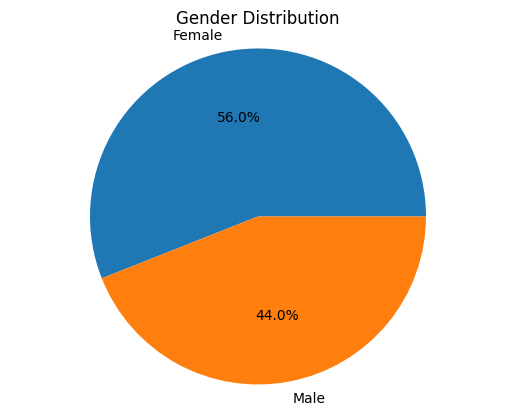

In [22]:
# Plot the pie chart
plt.pie(df.Gender.value_counts(), labels=df.Gender.value_counts().index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Gender Distribution')
plt.show()

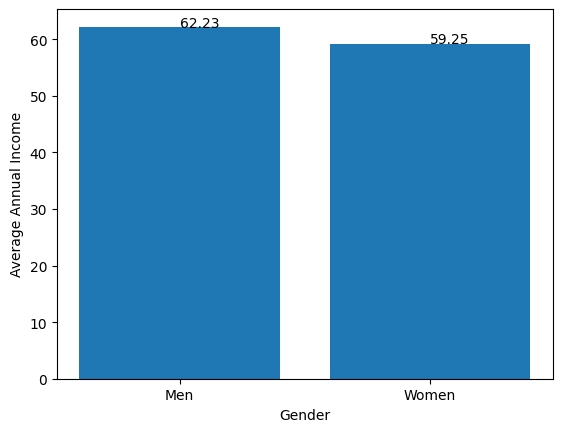

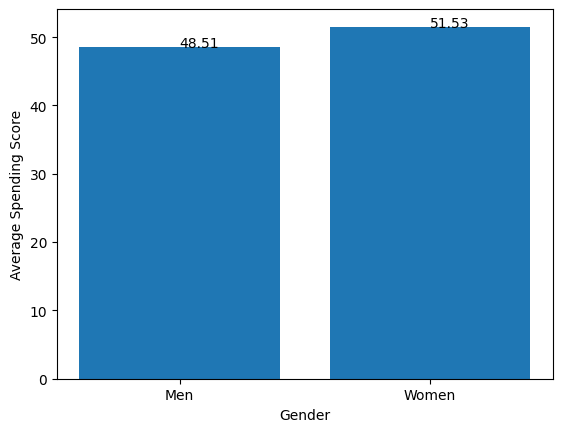

In [40]:
# Calculate the average annual income for men and women
average_annual_income_men = df[df['Gender'] == 'Male']['AnnualIncome'].mean()
average_annual_income_women = df[df['Gender'] == 'Female']['AnnualIncome'].mean()

# Calculate the average spending score for men and women
average_spending_score_men = df[df['Gender'] == 'Male']['SpendingScore'].mean()
average_spending_score_women = df[df['Gender'] == 'Female']['SpendingScore'].mean()

# Plot the average annual income by gender
data = [round(average_annual_income_men,2), round(average_annual_income_women,2)]

# Create a bar chart
plt.bar(["Men", "Women"], data)
# Annotate the bar chart with the exact number
for i in range(len(data)):
    plt.annotate(str(data[i]), (i, data[i]))
plt.xlabel('Gender')
plt.ylabel('Average Annual Income')
plt.show()

# Plot the average spending score by gender
data2 = [round(average_spending_score_men,2), round(average_spending_score_women,2)]
plt.bar(["Men", "Women"], data2)
# Annotate the bar chart with the exact number
for i in range(len(data2)):
    plt.annotate(str(data2[i]), (i, data2[i]))
plt.xlabel('Gender')
plt.ylabel('Average Spending Score')
plt.show()

#### Note
Men have a higher average annual income than women. The average annual income for men is **62,230 dollars** while the average annual income for women is **59,250 dollars** .<br>
*However* Women spends more in the mall with average spending score **51.53** higher than men spending score **48.51**.

We can use the **qcut()** function to divide the customers into four segments based on their annual income. The four segments are:

* Low: Annual income less than 50,000 dollar
* Medium-Low: Annual income between 50,000 and 75,000 dollar
* Medium-High: Annual income between 75,000 and 100,000 dollar
* High: Annual income greater than 100,000 dollar

In [34]:
# Create a new column called "Segment"
df['Segment'] = pd.qcut(df['AnnualIncome'], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Calculate the average age for each segment
average_age_by_segment = df.groupby('Segment')['Age'].mean()

# Calculate the average spending score for each segment
average_spending_score_by_segment = df.groupby('Segment')['SpendingScore'].mean()

# Print the results of the analysis
print(pd.DataFrame({
    'Average Age': average_age_by_segment,
    'Average Spending Score': average_spending_score_by_segment
}))

             Average Age  Average Spending Score
Segment                                         
Low               35.280               49.480000
Medium-Low        44.220               50.380000
Medium-High       38.300               50.133333
High              37.425               50.975000


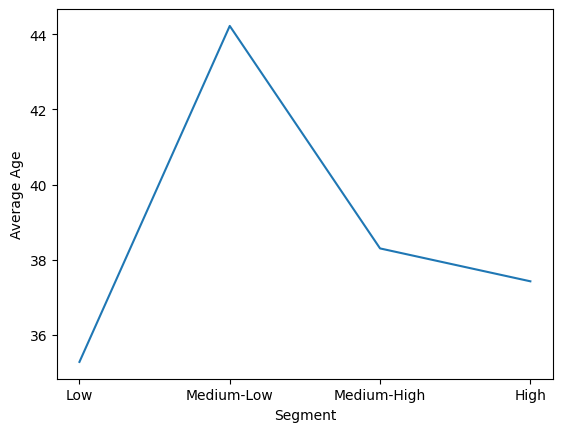

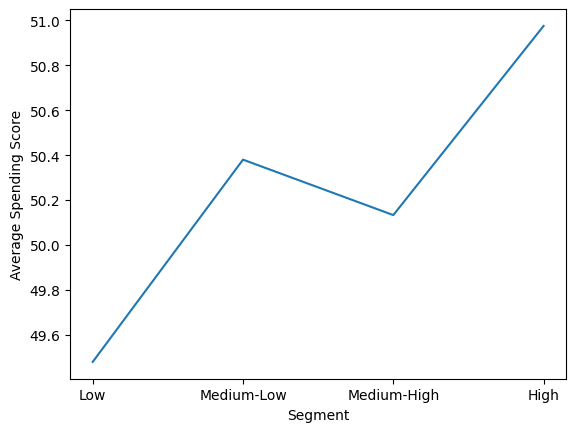

In [35]:
# Plot the average age by segment
plt.plot(average_age_by_segment)
plt.xlabel('Segment')
plt.ylabel('Average Age')
plt.show()

# Plot the average spending score by segment
plt.plot(average_spending_score_by_segment)
plt.xlabel('Segment')
plt.ylabel('Average Spending Score')
plt.show()

## Conclusion
Average age of customers who have a high annual income is **37 years** and they have the highest spending socre with **51** <br>
Low Annual income customers are the youngest with average age of **35 years** with the lowest spending score!<br>
<br>
Men have a higher average annual income than women. The average annual income for men is **62,230 dollars** while the average annual income for women is **59,250 dollars** . *However* Women spends more in the mall with average spending score **51.53** higher than men spending score **48.51**. reflecting to the fact that women in general spends more than men